# Time Series Analysis


**Why Time Series Analysis?**


Time series data often comes to the picture when monitoring industrial processes or tracking corporate business metrics. The essential difference between modeling data via time series methods or using the process monitoring methods according to analyse on traditional data


**What is Time Series?**

Time series analysis is a statistical technique that aim to analyse the time series data and trends on the data.  Time series data means that data is in a series of  particular time periods or intervals.


**Components of Time Series?**

Time series consist of four components: Seasonal variations, Trend variations, Cyclical variations, Random variations.

**What is Stationary?**

Stationarity is an important characteristic of time series. A time series is said to be stationary if its statistical properties do not change over time. In other words, it has constant mean and variance, and covariance is independent of time.

**Arima Model**

ARIMA is the short name of the Auto Regressive Integrated Moving Average which is is actually a class of models that explains a given time series based on its own past values that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

**Table of Contents**

====================================================================================================

### Table of Contents

1. Problem Statement and Dataset
2. Descriptive Statistics and Data Visualization
3. A Naive Approach
4. Simple average Method
5. Moving average Method
6. Single Exponential smoothing Method
7. Holt’s linear trend method
8. Holt’s Winter seasonal method
9. ARIMA Model
10. Stationarize the Series
11. AR Model
12. Combined Model
13. Covert to Hourly Predictions

## 1 - Problem Statement and Dataset



* Demand 


Measurement 1,2 & 3 are updated with a new measurement every minute, measurement 4 & 5 are updated with new measurement every 3rd hour.


**Energy Demand (Regression):** Heavily dependant on seasonal patterns (time-of-day, day-of-week, time-of-year),and partly on weather

> **Descriptive model :** Model the relationship between time and demand.

> **Predictive model :** Since predicting the time as a given time in the future is trivial, this is almost for free. Different types include Long-term Load Forecasting (months-ahead), Short-term Load Forecasting (day-head or week-ahead), and Ultra Short-term Load Forecasting (hours-ahead).


In [1]:
#101
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import plotly.express as px
import seaborn as sns

In [2]:
#102
df = pd.read_csv("demand_df.csv")
df_=pd.read_csv("demand_df.csv",parse_dates = ["time"],index_col=["time"])

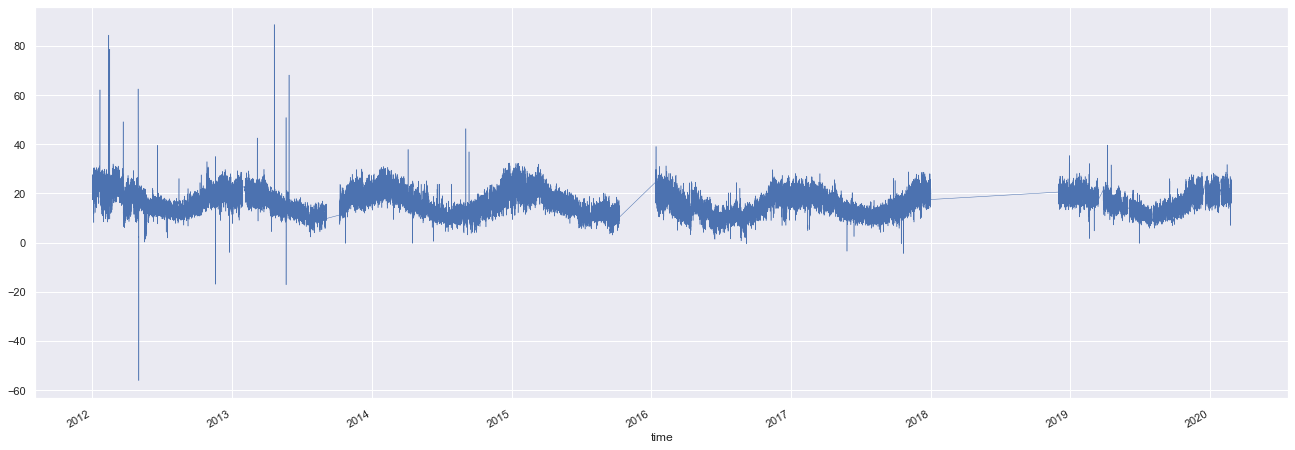

In [3]:
#103
#lets vizualizate whole demand data with time
sns.set(rc={'figure.figsize':(20, 8)})
df_['Total'].plot(linewidth=0.5);

In [4]:
#104
#checking some statistic based on spesific times

df_["2019-01"].Total.mean()

20.10426086956523

In [5]:
#105
df_["2020-01-02"].Total.median()

17.85

In [6]:
#106
df_['2020-01-01':'2020-02-01'].resample("W").mean() #take weekly

,Total
time,
2020-01-05 00:00:00+00:00,19.169286
2020-01-12 00:00:00+00:00,21.226566
2020-01-19 00:00:00+00:00,21.551497
2020-01-26 00:00:00+00:00,20.563813
2020-02-02 00:00:00+00:00,20.591807


## 2- Descriptive Statistics and Data Visualization

Let’s visualize the train and test data together to know how it varies over a time period.

<AxesSubplot:title={'center':'Hourly'}, xlabel='time'>

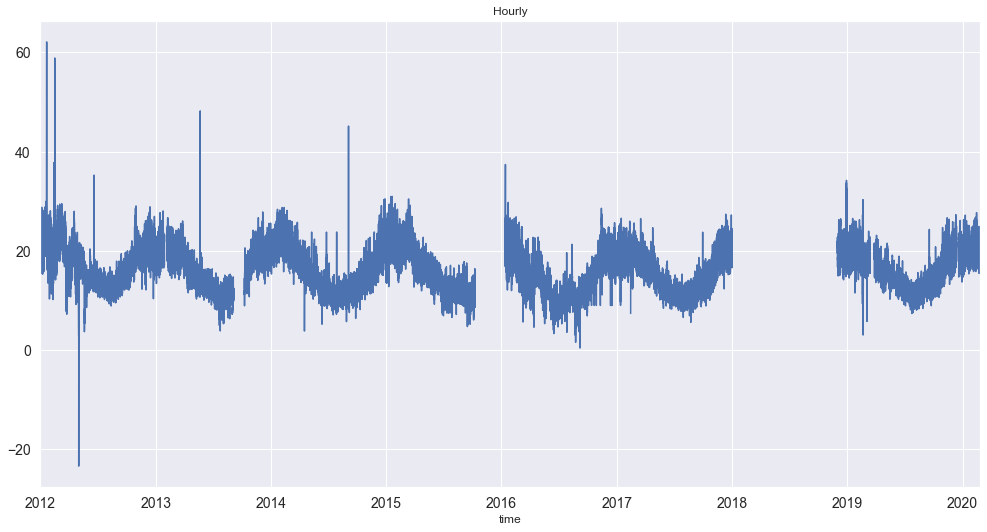

In [7]:
#Hourly
H = df_.Total.resample("H").mean()
H.plot(figsize = (15,8), title = "Hourly", fontsize = 14)

<AxesSubplot:title={'center':'Daily'}, xlabel='time'>

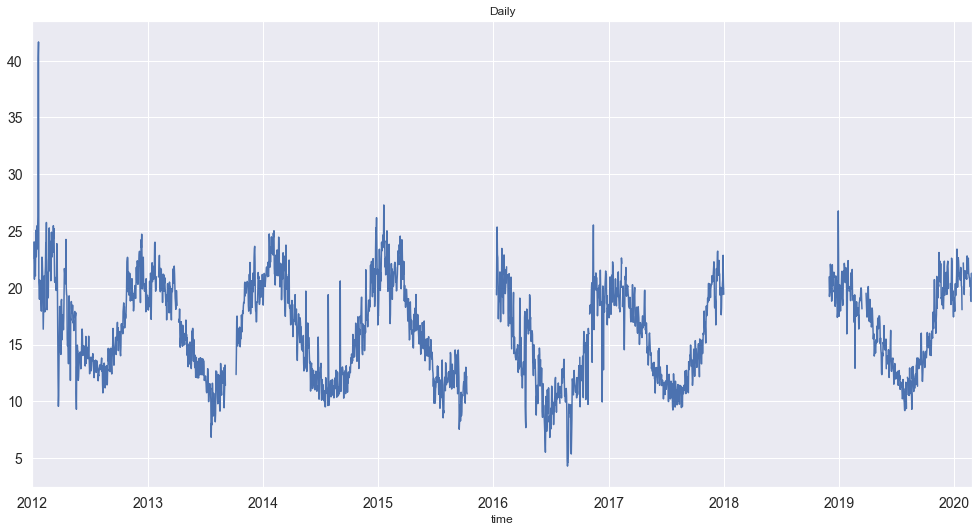

In [8]:
#daily
D=df_.Total.resample("D").mean()
D.plot(figsize = (15,8), title = "Daily", fontsize = 14)

<AxesSubplot:title={'center':'Weekly'}, xlabel='time'>

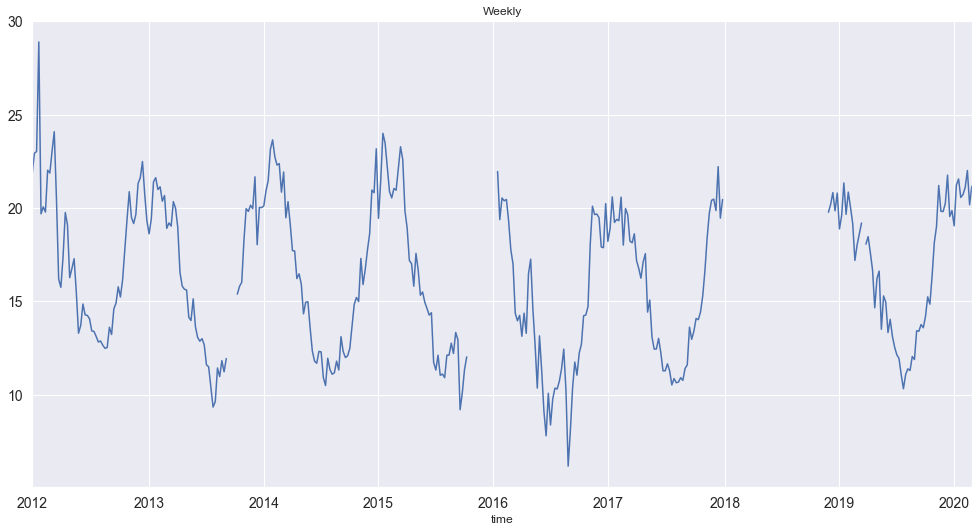

In [9]:
#weekly
W=df_.Total.resample("W").mean()
W.plot(figsize = (15,8), title = "Weekly", fontsize = 14)

<AxesSubplot:title={'center':'Mountly'}, xlabel='time'>

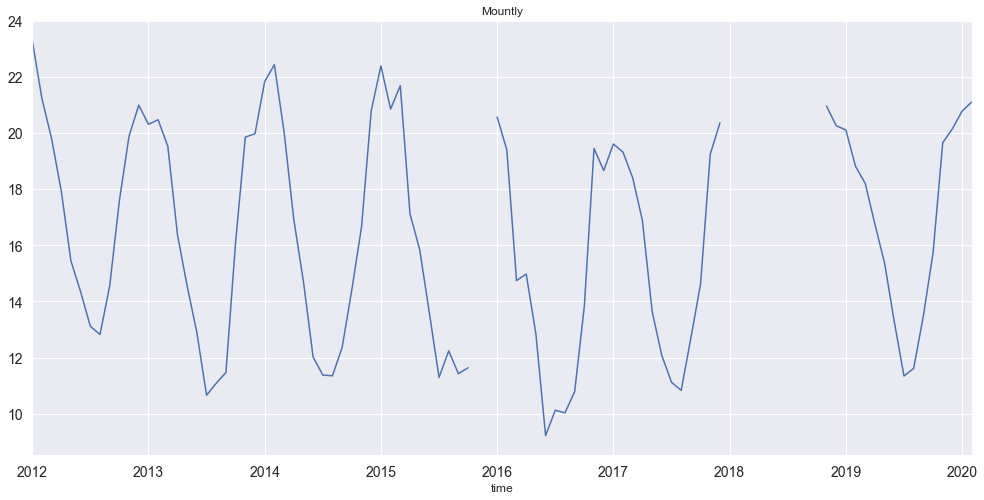

In [10]:
%matplotlib inline
#mountly
M=df_.Total.resample("M").mean()
M.plot(figsize = (15,8), title = "Mountly", fontsize = 14)

<AxesSubplot:title={'center':'Quartly'}, xlabel='time'>

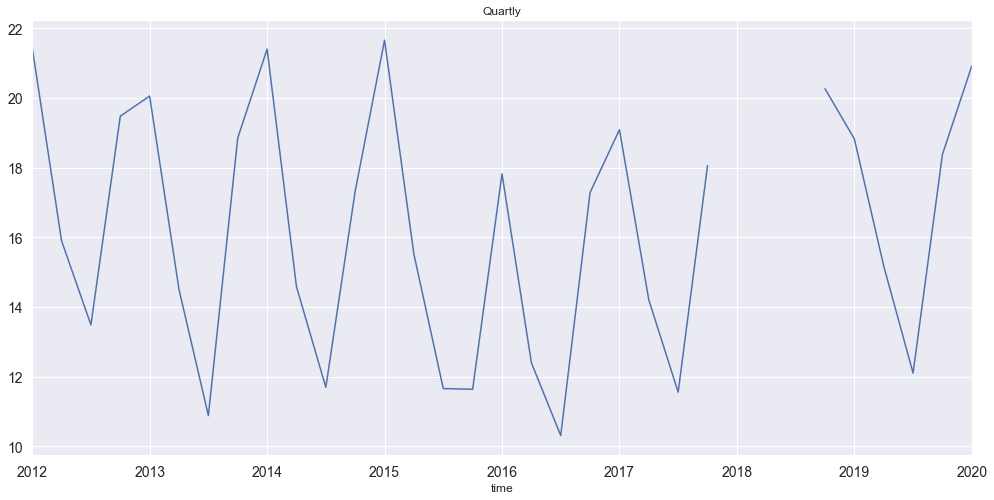

In [11]:
#Quartly
Q= df_.Total.resample('Q').mean()
Q.plot(figsize = (15,8), title = "Quartly", fontsize = 14)

In [12]:
#split data 
import numpy as np 
train, test= np.split(df, [int(.8 *len(df))])

In [13]:
train_original = train.copy()
test_original = test.copy()

In [14]:
train['Datetime'] = pd.to_datetime(train.time)
test['Datetime'] = pd.to_datetime(test.time)
train_original['Datetime'] = pd.to_datetime(train_original.time)
test_original['Datetime'] = pd.to_datetime(test_original.time)

In [15]:
for i in (train, test, train_original, test_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day']= i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

In [16]:
train['Day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [17]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
    
temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2

One can say that from the graph that the demand of the energy is relatively stable from the start, however makes sharp fluctuates over the time. 

<AxesSubplot:xlabel='year'>

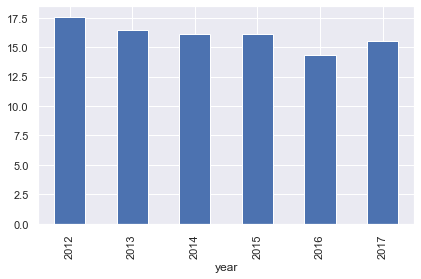

In [18]:
train.groupby('year')['Total'].mean().plot.bar()

<AxesSubplot:xlabel='month'>

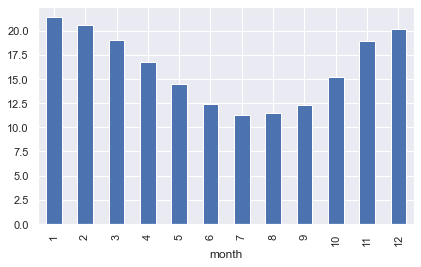

In [19]:
train.groupby('month')['Total'].mean().plot.bar()

<AxesSubplot:xlabel='day'>

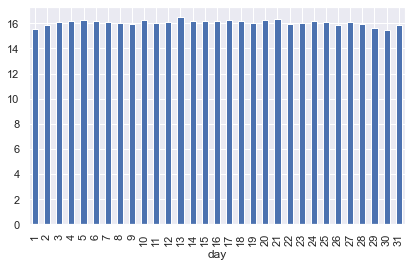

In [20]:
train.groupby('day') ['Total'].mean().plot.bar()

<AxesSubplot:xlabel='Hour'>

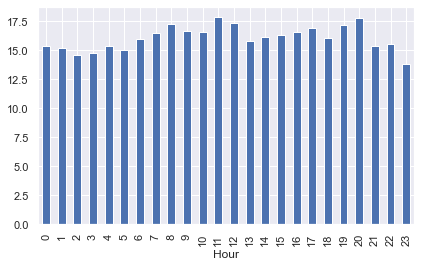

In [21]:
train.groupby('Hour')['Total'].mean().plot.bar()

<AxesSubplot:xlabel='weekend'>

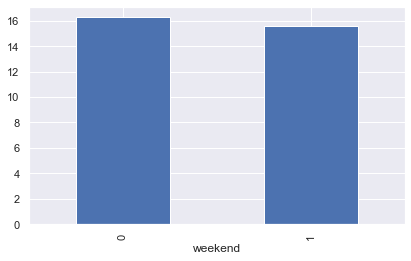

In [22]:
train.groupby('weekend') ['Total'].mean().plot.bar()

<AxesSubplot:xlabel='Day of week'>

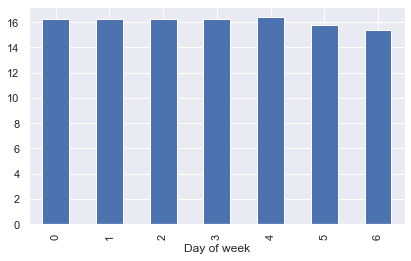

In [23]:
train.groupby('Day of week') ['Total'].mean().plot.bar()

In [24]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%y-%m-%d %H:%M')
test.index = test.Timestamp

#Converting to Daily mean 
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime, format='%y-%m-%d %H:%M')
train.index = train.Timestamp

#Converting to Daily mean
train = train.resample('D').mean()

In [25]:
train.tail(2)

,Total,year,month,day,Hour,Day of week,weekend
Datetime,,,,,,,
2017-08-12 00:00:00+00:00,9.743156,2017.0,8.0,12.0,11.622419,5.0,1.0
2017-08-13 00:00:00+00:00,8.818963,2017.0,8.0,13.0,4.664815,6.0,1.0


### Divide data into training and validation

In [27]:
Train = train['2012-01-01':'2017-05-01']
valid = train['2017-02-01':'2017-08-13']

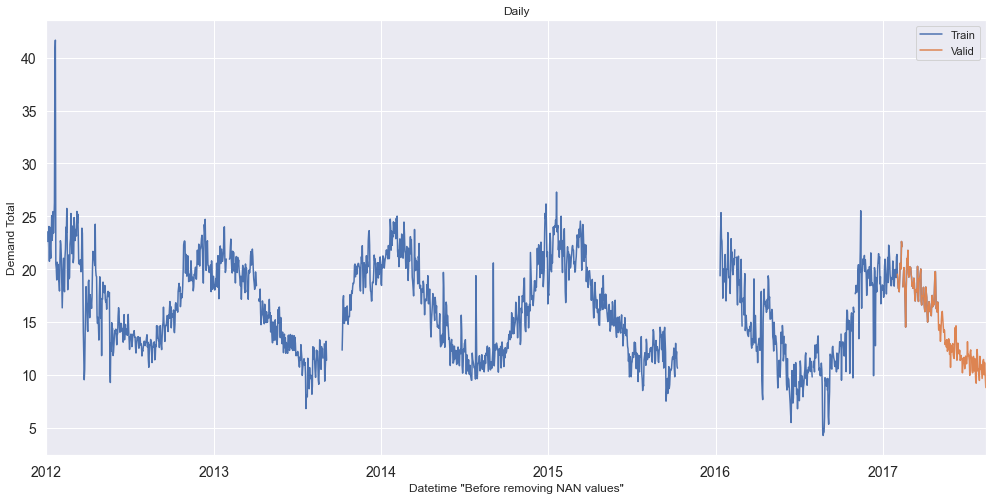

In [28]:

Train.Total.plot(figsize = (15,8), title = 'Daily', fontsize = 14, label = 'Train')
valid.Total.plot(figsize = (15,8), title = 'Daily', fontsize =14, label = 'Valid')
plt.xlabel('Datetime "Before removing NAN values"')
plt.ylabel('Demand Total')
plt.legend(loc = 'best')

## 3 - Navive Approach
In case we want to predict the demand of the energy for next day, one simple approach would be taking the last day valueand estimate the same value for the next day. This is basically an approach that assumes the expexted day is equal to last observed day. The approach is called Naive method which is limited but can be usefull for some simple problems that does not expect sharp changes on the time series data.

y(hat)(t+1) = y(t)


Implementation of the Naive method to estimate the demand for test data.

Text(0.5, 1.0, 'Naive Forecast')

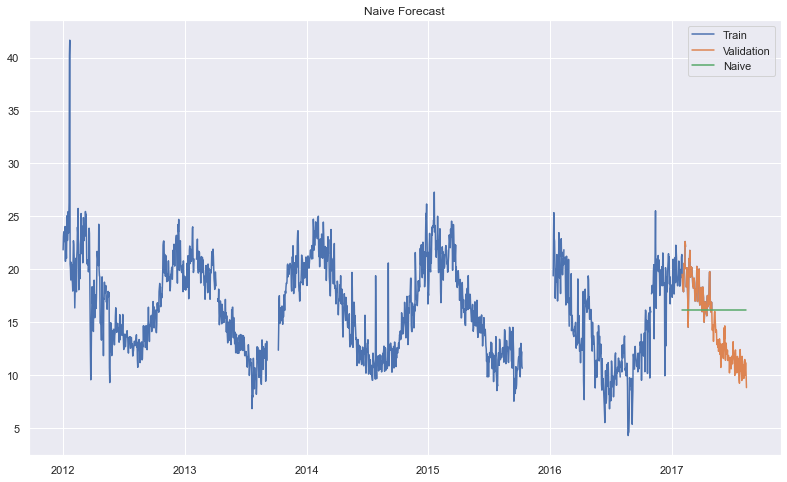

In [29]:
dd = np.asarray(Train.Total)
y_hat =valid.copy()
y_hat['naive']= dd[len(dd)- 1]
plt.figure(figsize = (12,8))
plt.plot(Train.index, Train['Total'],label = 'Train')
plt.plot(valid.index, valid['Total'], label = 'Validation')
plt.plot(y_hat.index, y_hat['naive'],  label = 'Naive')
plt.legend(loc = 'best')
plt.title('Naive Forecast')

In [30]:
#DROP MISSING VALUES
valid= valid.dropna()
Train = Train.dropna()

Text(0.5, 1.0, 'Naive Forecast')

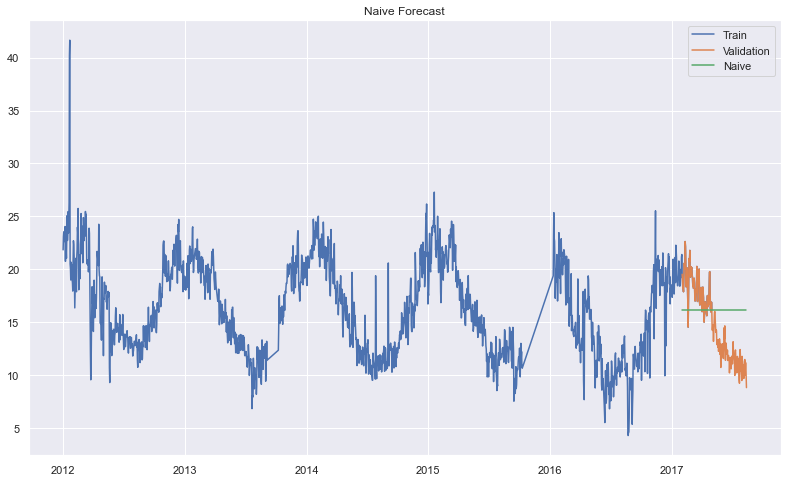

In [31]:
dd = np.asarray(Train.Total)
y_hat =valid.copy()
y_hat['naive']= dd[len(dd)- 1]
plt.figure(figsize = (12,8))
plt.plot(Train.index, Train['Total'],label = 'Train')
plt.plot(valid.index, valid['Total'], label = 'Validation')
plt.plot(y_hat.index, y_hat['naive'],  label = 'Naive')
plt.legend(loc = 'best')
plt.title('Naive Forecast')

### Calculate RMS Error for Naive Approach
Calculating the Rmse to check to accuracy of our model on test data.

In [32]:

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(valid.Total, y_hat.naive))
rmse

3.6923299394798392

### Evaluation of Naive Approach
From the Rmse and the graphs above, one can say that Naive method was not a good approach for our kind of data that fluctuates over the time. It would have been suitable if our data was more stable. Luckly, we know that Naive approach is not the only way to create hypotheses for our Timeseries Data, so we can work on other methods to improve the predictibility.

## 4 - Simple Avarage Method
Simple avarage method is another method that is being used for the Timeseries data that has icreasings and desreasings over the time but woth small amount. In another word, the avarage of the data stays relatively constant since it has increments and decreamets on the data. So in this kind of senarios, one can say that it is possible to estimate the next day by looking the avarage of last past time points. In this this approach, next time point will be near the avarage of the last previous points. This is called Simple Avarage method.

**y(x+1) = (1/x) Toplam isareti(yi)(i 1den x e kadar)**

For calculating the simple avarage, we find the avarage of the previous demands and consider it as next day value. In some situations this approach works well but we do not know if it works for our scenario of the data. 

*We* can calculate Rmse to check to precistion power of our Simple Avarage method on our data.

### Evaluation of Simple Avarage Method
it is obvious that the Simple Avarage Method did not work well for our data.
One can say that this model works if the avarage of the demand value would have been constant. This method was not better than Naive Approach either. So it is still neccecary to try other methods to see which model is better for our data.


## 5 - Moving Avarage Method
One can say that, another approach would be to calculate avarage of the all the previously seen data points. In another words, calculating mean of the all the previous time points. This approach still sounds like Simple Avarage method but it is kind of improved version of Simple avarage method. However in most of the scenarios it is not wise to use the avarage of the all previous time points since the trends in the data at the beginning of the time is usually different than the trends in data at the end. So, the suggestion here is to consider the avarage of the energy demand for last few periods only. This forecasting approach calculates the avarage by using time window or sliding window of a size. 


With this method, we can estimate the next value or values in a time series 
according the avarage of a fixed finite number 'p' of the previous values. 

**Buraya hesaplaama sekli koyulcak.**

A moving average can be quite usefull, according to the right decision of the  p value for the series.

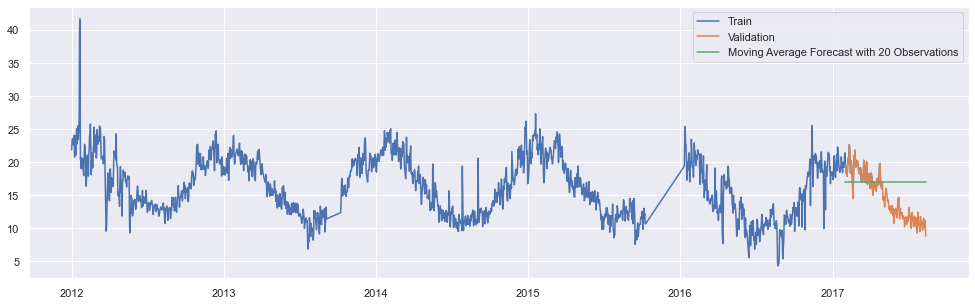

In [33]:
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['Total'].rolling(20).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Total'], label = 'Train')
plt.plot(valid['Total'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'],label = 'Moving Average Forecast with 20 Observations')
plt.legend(loc = 'best')
plt.show()


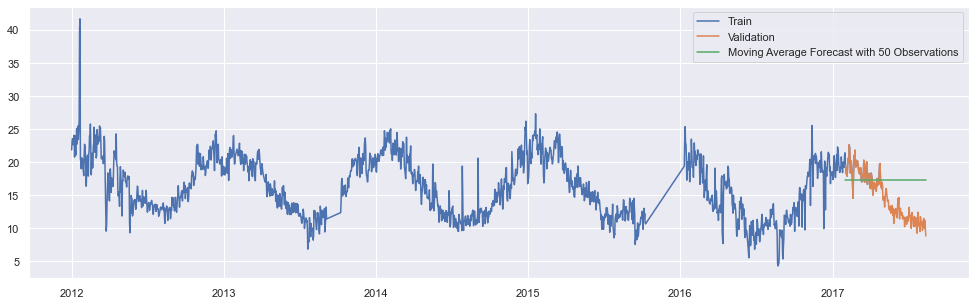

In [34]:
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast']= Train['Total'].rolling(50).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Total'], label = 'Train')
plt.plot(valid['Total'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = "Moving Average Forecast with 50 Observations")
plt.legend(loc = 'best')
plt.show()

### RMS Error for Moving Average

We decided chose the data of last X months only. We can now calculate Rmse to check the predition power of the model on our data.

In [35]:
rmse = sqrt(mean_squared_error(valid['Total'], y_hat_avg['moving_average_forecast']))
rmse

4.252972342611661


**Evaluation of Moving Avarage Method**

According to the results, one can say that Naive approach is still better than Simple Avarage Method and Moving Avarage Method. An improvement over the Moving Avarage method would be Weighthed Moving avarage method. In the Moving Avarage method we calculated the avarage of the energy demand by weighting all the past values equally. In nother word, WEighthed Moving avarage id moving the avarage where sliding window values are given different weights, so this can lead the situations that more recent or former time points would have more impact on the predictions

Buaraya sekil koyulcak

This technique reuires the list of the weight that we have freedom of the weightining the previous time points as we please.

## 6 - Simple Exponential Smoothing
Having seen the previous methods and their approaches, one can have the understaning of the methods their prediction performances on our data. Another observation would the differences on the performance of the methods, however we still need another approach that can be suitable for our data. May be we need something between the previousy seen methods that takes all the previous data into account and still weight the some data points differently like adjust the weights larger for more recent observations in the data than the older ones. This approach is called Simple Exponential Smooting. In the Simple Exponential Smooting forecats are being calculated by using the weighted avarages where the weights are decreasind exponentionaly as observations come from older in the past. So bigger weights are associated with the recent ones.

**Buraya sekil koyulcak.**

where 0≤ α ≤1 is the smoothing parameter.

The one-step-ahead forecast for time T+1 is a weighted average of all the observations in the series y1,…,yT. The rate at which the weights decrease is controlled by the parameter α.

you can will see that the expected value ŷx is the sum of two products: α⋅yt and (1−α)⋅ŷ t-1.

it can also be written as :

**Buarayada sekil koyabilirsin**

So, weighted moving average with two weights: α and 1−α.

it shows that, 1−α is multiplied by the previous expected value ŷ x−1 which makes the expression recursive. And this is why this method is called Exponential. The forecast at time t+1 is equal to a weighted average between the most recent observation yt and the most recent forecast ŷ t|t−1.

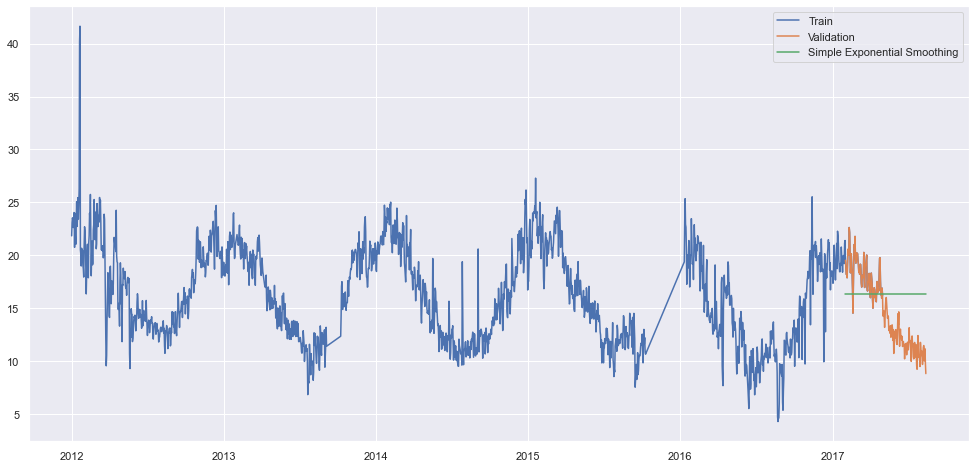

In [36]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt

y_hat = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Total'])).fit(smoothing_level = 0.6,optimized = False)
y_hat['pred_'] = fit2.forecast(len(valid))
plt.figure(figsize =(15,8))
plt.plot(Train['Total'], label = 'Train')
plt.plot(valid['Total'], label = 'Validation')
plt.plot(y_hat['pred_'], label = 'Simple Exponential Smoothing')
plt.legend(loc = 'best')

Now we can calculate Rmse to check to prediction power of the Simple Exponentional Smooting Method.

### RMSE Error for Simple Exponential Smoothing 

In [37]:
rmse = sqrt(mean_squared_error(valid.Total, y_hat['pred_']))
rmse

3.7652003289030698

**Evaluation  of Simple Exponential Smoothing**

Now we can see the results for Exponentional Smooting Method with alpha value 0.6. This parameters can be tuned and different results can be seen. The results from the Simple Exponentional Method is so far the best.

## 7 - Holt's Linear Trend Model
So far we have tried few methods to predict the demand of the energy however one can say that previous methods did not work well for our data. Also non of the of these methods took the trends in the data into account. So we need a more complex method that has a different approach. A method that takes the trends of the data into account, which is called Holt’s Linear Trend method is worth to try on our data. Timeseries data can be decomposed into different components such as Trend, Seasionality and Residiual. 

Each Time series dataset can be decomposed into it’s componenets which are Trend, Seasonality and Residual. Any dataset that follows a trend can use Holt’s linear trend method for forecasting.

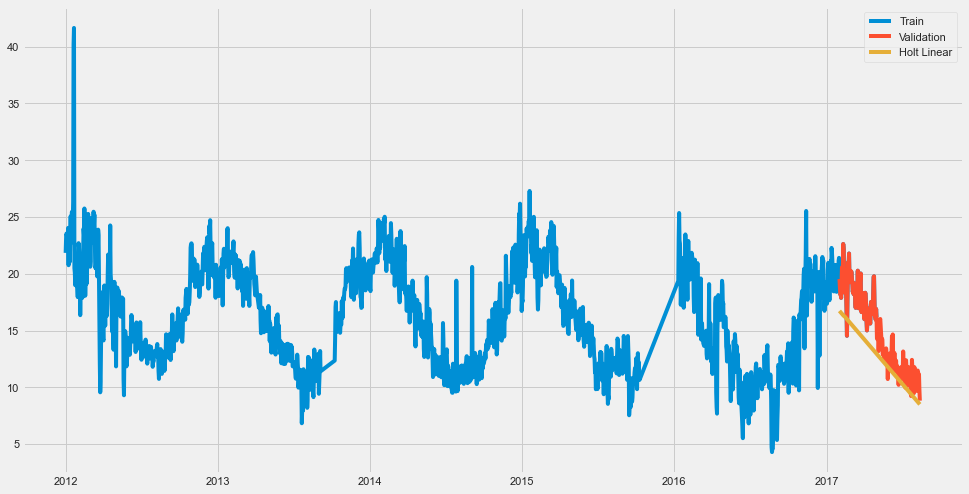

In [38]:
y_hat_holt = valid.copy()
fit1 = Holt(np.asarray(Train['Total'])).fit(smoothing_level = 0.3, smoothing_slope = 0.1)
y_hat_holt['Holt_linear'] = fit1.forecast(len(valid))
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,8))
plt.plot(Train.Total, label = 'Train')
plt.plot(valid.Total, label = 'Validation')
plt.plot(y_hat_holt['Holt_linear'], label = 'Holt Linear')
plt.legend(loc = 'best')

From the graphs, we can say that, out data has its onw trends, so we can use Holt’s Linear Trend Method to try to forecast the demands of the energy in the future. Holt's approach is extended version of the Simple Exponentional Smooting method that allow us to combine the trebds in the data to forecast. 
In another words, it is improved version of the exponential smoothing that is applied to both level(the average value in the series) and trend. 
Mathematically we have three equations: one for level, one for the trend and one to combine the level and trend to get the expected forecast ŷ.


In the above equations, you can see that we have added level and trend to generate the forecast equation.
As we have seen in the Simple Exponentional Method, the level equation shows 
that it is  a weighted average of observation and the within-sample one-step-ahead forecast The trend equation shows that it is a weighted average of the estimated trend at time t based on ℓ(t)−ℓ(t−1) and b(t−1), the previous estimate of the trend.We can now add these equations to generete forecast equation. 


** Eger sekiller yoksa Burasi silinebilinir**
(it can also help us to generate a multiplicative forecast equation by multiplying trend and level instead of adding it. When the trend increases or decreases linearly, additive equation is used whereas when the trend increases of decreases exponentially, multiplicative equation is used.Practice shows that multiplicative is a more stable predictor, the additive method however is simpler to understand.)
 Eger sekiller yoksa Burasi silinebilinir

Now we can calculate Rmse to check to see prediction power of the Holt's Linear Trend Method on our data.

In [39]:
rmse = sqrt(mean_squared_error(valid.Total, y_hat_holt.Holt_linear))
rmse

2.6842325083880603

### Make Predictions on test set

In [40]:
predict = fit1.forecast(len(test))
test['prediction'] = predict

In [41]:
#Calculating hourly ration of count
train_original['ratio'] = train_original['Total']/train_original['Total'].sum()

#Grouping hourly ratio
temp = train_original.groupby(['Hour']) ['ratio'].sum()

#Group by to csv format
pd.DataFrame(temp, columns= ['Hour', 'ratio']).to_csv('Groupby.csv')
temp2 = pd.read_csv("Groupby.csv")
temp2 =temp2.drop('Hour.1',1)
#Merge test and test_original on day, month and year
merge = pd.merge(test, test_original, on = ('day', 'month','year'), how = 'left')
merge['Hour'] = merge['Hour_y']
merge = merge.drop(['year','month','day','Hour_x','Datetime','Hour_y'], axis =1)

#Predicting by merging temp2 and merge
prediction = pd.merge(merge, temp2, on = 'Hour',how = 'left')

#Converting the ration to original scale
prediction['Total'] = prediction['prediction'] * prediction['ratio'] * 24
#prediction['ID'] = prediction['ID_y']
prediction.head()

,Total_x,prediction,time,Total_y,Hour,ratio,Total
0,10.408514,16.728134,2017-08-13T10:14:52Z,10.23,10.0,0.043142,17.320265
1,10.408514,16.728134,2017-08-13T10:15:52Z,10.51,10.0,0.043142,17.320265
2,10.408514,16.728134,2017-08-13T10:16:52Z,10.51,10.0,0.043142,17.320265
3,10.408514,16.728134,2017-08-13T10:17:52Z,10.51,10.0,0.043142,17.320265
4,10.408514,16.728134,2017-08-13T10:18:52Z,10.55,10.0,0.043142,17.320265


In [42]:
submission = prediction.drop(['Total_x','Total_y','Hour','ratio'], axis =1)
pd.DataFrame(submission, columns = ['ID','Total']).to_csv('Holt_Linear.csv')

### Evaluation of Holt's Linear Trend Method.
WE can see taht the Holt's Linear Trend Method perform better on our data according to the previous models that we have tried on our data. We can also tune the parameters to get even a better results.

## 8 - Holt's Winter's Model
Imagine a Ski resort, that gets lots of visitiors during the winters but almost no visitors for summer season. So the profit of the resort will be very high in winters and very low in summers. That repeats every year with the same pattern. This is called seasonality. Therefore the user or profit data of this resort would show as fixed intervals of a time period from seasonality. Previous models that we have seen so far, do not consider the seasonality of the dataset during the forecasting. So we need to try a model that consider the seasonality during the forecasting the energy demand. Holt’s Winter is a method that taking the seasonality into account durig the forecasting. it is also called as triple exponential smoothing since it applies the exponential smoothing to seasonlity, level and trends. So We can expect that the performance of Holt’s winter method will be better than the previous models that we have done so far.
The Holt's Winter method has forecast equation and three smooting equations. 


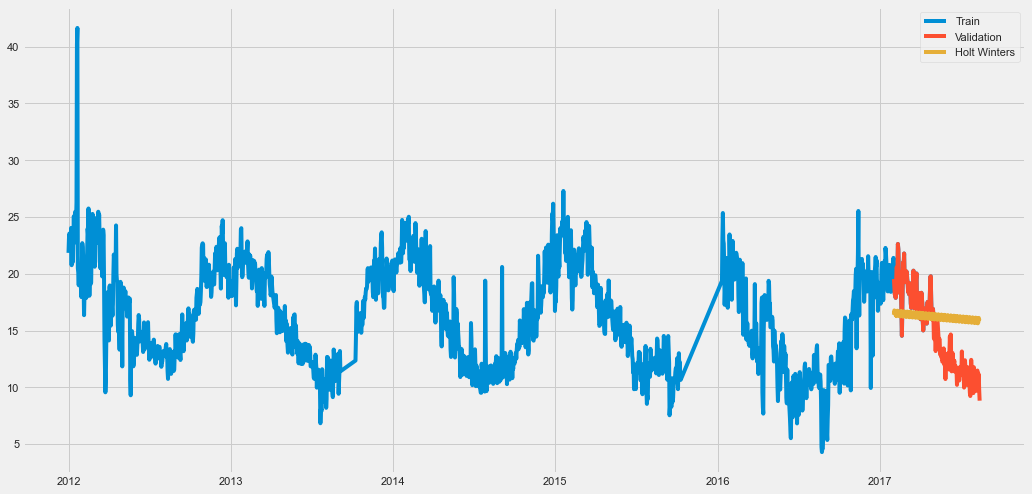

In [43]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Total']), seasonal_periods= 7, trend = 'add', seasonal= 'add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize = (16,8))
plt.plot(Train['Total'], label = 'Train')
plt.plot(valid['Total'], label = 'Validation')
plt.plot(y_hat_avg.Holt_Winter, label = 'Holt Winters')
plt.legend(loc = 'best')

Now we can calculate Rmse to check to see prediction power of the Holt's Winter Method on our data.

In [44]:
rmse = sqrt(mean_squared_error(valid['Total'], y_hat_avg['Holt_Winter']))
rmse

3.5411993538022015

### Evaluation of Holt's Winter Method.
From the results of the Holt's Winter methad, one can say that considering seasonality during the forecasting gives better results. The seasonal period was chosen as 7 data is repeating weekly. Hyperparameter tuning can be applied according to the data.

###  Apply Holt Winter's on test data

In [45]:
#Merge test and test_original on day,month and year
merge = pd.merge(test, test_original, on = ('day', 'month', 'year'), how = 'left')
merge['Hour']= merge['Hour_y']
merge.head()
merge = merge.drop(['year', 'month', 'Datetime','Hour_x', 'Hour_y'], axis =1)

#Predicting by merge and temp2
prediction = pd.merge(merge, temp2 , on = 'Hour', how = 'left')

#Converting the ration to original scale
prediction['Total'] = prediction['prediction'] * prediction['ratio'] *24
prediction.head()

,Total_x,day,prediction,time,Total_y,Hour,ratio,Total
0,10.408514,13.0,16.728134,2017-08-13T10:14:52Z,10.23,10.0,0.043142,17.320265
1,10.408514,13.0,16.728134,2017-08-13T10:15:52Z,10.51,10.0,0.043142,17.320265
2,10.408514,13.0,16.728134,2017-08-13T10:16:52Z,10.51,10.0,0.043142,17.320265
3,10.408514,13.0,16.728134,2017-08-13T10:17:52Z,10.51,10.0,0.043142,17.320265
4,10.408514,13.0,16.728134,2017-08-13T10:18:52Z,10.55,10.0,0.043142,17.320265


In [46]:
prediction['Total_x']= prediction['Total_y']
submission = prediction.drop(['Total_x','Total_y','day','Hour','prediction','ratio'], axis =1)

pd.DataFrame(submission, columns = ['ID','Total']).to_csv('Holt winters.csv')

## 9 - ARIMA Model 
So far we have seen seven different models, and we can still try more models. One of the well known models is the Autoregressive Integrated Moving average model that is called ARIMA. it aims to describe the correlations in the data with each other. There is also Sesosonal Arima that take the seaosanilty of the data into consideration as we have seen with Holt’ Winter method.

As the TimeSeries is a collection of data points collected at time intervals, it is time dependent. And TimeSeries models work on the assumption that the TS is stationary, which means that the statical features of the data such as mean and variance remain constant over the time period. So, the stationary level of the data must be known, it can be checked by Plotting Rolling Statistics. It is way of cheching the moving average or moving variance whether it varies with time. Another way of cheching the staionary level of the Time Series data is 
Dickey-Fuller Test.  it takes null hypotheses into account that the null hypothesis is that the Time Series is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’,the null hypothesis can be rejected and one can then say that the series is stationary.

In [47]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    #Determine rolling statistics
    
    rolmean = pd.Series(timeseries).rolling(window=24).mean()

    rolstd = pd.Series(timeseries).rolling(window=24).std()
    
    #Plot rolling Statistics
    orig = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
    std = plt.plot(rolstd, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block = False)
    
    #Perform Dickey Fuller test
    print("Results of Dickey Fuller test: ")
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '# Lag Used', 'Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

For sake of checking stationary level of our Time series data, rolling statistics plots along with Dickey-Fuller were used to generate the plot and standart deviation were used keep it similiar to mean.


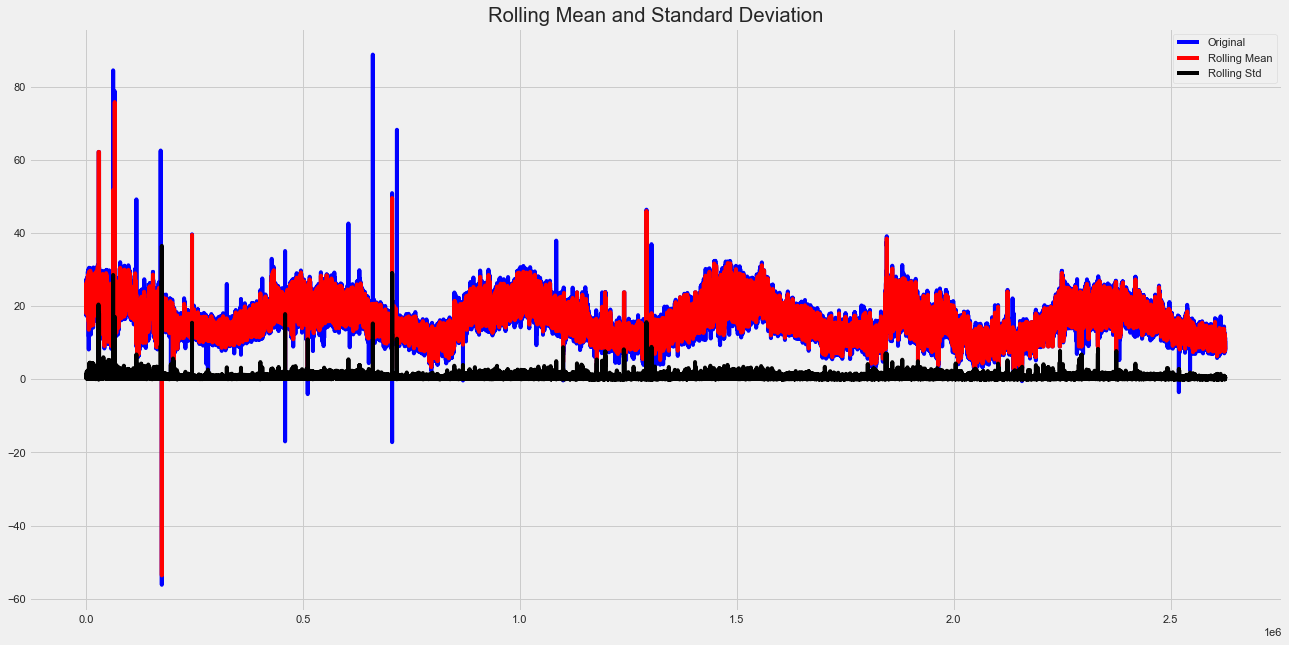

Results of Dickey Fuller test: 


In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=(20,10)
test_stationary(train_original['Total'])

## 10 - Stationarize the Series
What is our data is not stationary enough or not stationary at all. There are some approaches to make the time series data more stationary. Such as Detrending, Differencing and Removing the Seasonality.


#### Remove Trend
We simply remove the trend component from the series to get a stationary series.
One of the way to remove trends from the series would be the log transformation,high values can be penalized more that smaller values with log transofrmation. 

In [ ]:
Train_log = np.log(Train['Total'])
valid_log = np.log(valid['Total'])

In [1]:
#moving_avg = pd.rolling_mean(Train_log,24)
moving_avg = pd.Series(Train_log).rolling(window=24).mean()
plt.plot(Train_log)
plt.plot(moving_avg, color = 'red')

NameError: name 'pd' is not defined

In [ ]:
train_log_moving_diff = Train_log - moving_avg
train_log_moving_diff.dropna(inplace = True)
test_stationary(train_log_moving_diff)

### Differiencing can help to make series stable and eliminate trend
This is one of the most common approach to remove non-stationarity from the series to get a stationary series. In this approach, we can take the difference of the observation at a particular instant with that at the previous instant. This would help to improve stationarity of the data.

In [ ]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationary(train_log_diff.dropna())

###  Removing Seasonailty
Seasonlity of the Time Series data can also be removed from the series to get a stationary series. Seperation of the trends and seasonality can be observed from the results of removing operation. Below are the residuals.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize = (16,10))
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Total.values, freq = 24)
plt.style.use('default')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

### Let's check stationarity of residuals





In [ ]:
plt.figure(figsize = (16,8))
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace = True)
test_stationary(train_log_decompose[0])

From the results, one can say that Time Series is more stationary now because The Dickey-Fuller test statistics is lower than 1% critical value. More advance approaches can be used to see better results.

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train_log_diff.dropna(), nlags = 25)
lag_pacf = pacf(train_log_diff.dropna(), nlags = 25, method= "ols")

In [ ]:
plt.figure(figsize = (15,8))
plt.style.use("fivethirtyeight")
plt.plot(lag_acf)
plt.axhline( y = 0, linestyle = "--", color = "gray")
plt.axhline( y= -1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.axhline(y = 1.96 /np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.title("Autocorrelation Function")
plt.show()
# PACF
plt.figure(figsize = (15,8))
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = "--", color = "gray")
plt.axhline(y = -1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.axhline( y = 1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.title("Partial Autocorrelation Function")
plt.show()

## 11 - AR Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
plt.figure(figsize = (15,8))
model = ARIMA(Train_log, order = (2,1,0))  #here q value is zero since it is just AR Model
results_AR = model.fit(disp=-1)
plt.plot(train_log_diff.dropna(), label = "Original")
plt.plot(results_AR.fittedvalues, color = 'red', label = 'Predictions')
plt.legend(loc = 'best')

### Moving Average Model 


In [ ]:
plt.figure(figsize = (15,8))
model = ARIMA(Train_log, order = (0,1,2)) # here the p value is 0 since it is moving average model
results_MA = model.fit(disp = -1)
plt.plot(train_log_diff.dropna(), label = "Original")
plt.plot(results_MA.fittedvalues, color = "red", label = "Prediction")
plt.legend(loc = "best")

## 12 - Combined Model 

In [ ]:
plt.figure(figsize = (16,8))
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='Original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

If you look at the AR and MA models, they have almost the same results but combined one looks better. it can now be taking these values back to the original scale.

### Function to scale model to original scale
Combined model has given the best results, if we scale them to original values, we can see the how it performs. Storing the predicted results as a separate series and see it.

In [ ]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Total'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Total'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Total']))/given_set.shape[0]))
    plt.show()

In [ ]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Total'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Total']))/given_set.shape[0]))
    plt.show()

In [ ]:
test.tail(2)

## 13 - Covert to Hourly Predictions 

In [ ]:

predict = fit1.predict(start="2014-9-26", end="2015-4-26", dynamic=True)

In [ ]:
test['prediction']=predict

In [ ]:
#Merge test and test_original on day,month and year
merge = pd.merge(test,test_original, on = ('day', 'month', 'year'), how = 'left')
merge['Hour'] = merge['Hour_y']

#Predicting by merging merge and temp2
prediction = pd.merge(merge, temp2, on = 'Hour', how = 'left')

#Converting the ratio to original scale
prediction['Count'] = prediction['prediction'] * prediction['ratio'] * 24

In [ ]:
prediction['ID']=prediction['Total_y']
submission=prediction.drop(['day','Hour','ratio','prediction', 'Total_x', 'Total_y'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('SARIMAX.csv')

In [ ]:
submission